### Analyzing the World Cup Data

This dataset contains information about the FIFA WorldCup from inception till 2014. We shall now explore to see pattern and possible insights.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data with pandas

worldCupData = pd.read_csv('World cup data.csv')

In [3]:
# Showing the dataset first five data
worldCupData.head(5)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,


In [4]:
# Let's see the details of number of rows 
# and columns contained in the dataset
worldCupData.shape

(852, 11)

The dataset contains 852 rows and 11 columns.

In [5]:
worldCupData.describe()

,Year,HomeGoals,AwayGoals
count,852.000000,852.000000,852.000000
mean,1985.089202,1.811033,1.022300
std,22.448825,1.610255,1.087573
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,2.000000,1.000000
75%,2002.000000,3.000000,2.000000
max,2014.000000,10.000000,7.000000


Notes

* Year: The data year starts from 1930 and ends in 2014. 

* Highest Goal in a Match: The highest Homegoals scored is 10 and the highest Awaygoals is 7

##### Question 1: How many matches were played in each year world cup year from 1930

In [6]:
# Let's count how many matches were played

matchesPlayed = {}

for data in worldCupData['Year']:
    if data not in matchesPlayed:
        matchesPlayed[data] = 1
    else:
        matchesPlayed[data] += 1
        
print(matchesPlayed)

{1930: 18, 1934: 17, 1938: 18, 1950: 22, 1954: 26, 1958: 35, 1962: 32, 1966: 32, 1970: 32, 1974: 38, 1978: 38, 1982: 52, 1986: 52, 1990: 52, 1994: 52, 1998: 64, 2002: 64, 2006: 64, 2010: 64, 2014: 80}


Let's plot the histogram to see clearly the pattern formed by this data.

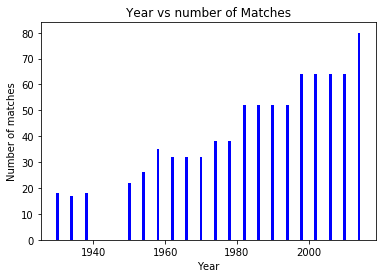

In [7]:
plt.title("Year vs number of Matches")
plt.xlabel("Year")
plt.ylabel("Number of matches")
plt.bar(matchesPlayed.keys(), matchesPlayed.values(), color="blue")
plt.show()

From the histogram, we can see that the number of matches played since 1930 has continued to increase, this is probably due to the increase in number of participating teams/country. 

There is also a gap in the chart which shows that the competition didn't take place in those years. We can find out why?? Not necessary though.

Year 2014 has the highest number of matches played with 80 while the lowest was 1934 with 17 

##### Question 2: Total goals scored for each tournament year

In [8]:
# Create a new column for total goals per game by adding 
# the HomeGoals and the AwayGoals
worldCupData['TotalGoalsPerGame'] = worldCupData['HomeGoals'] + worldCupData['AwayGoals']

In [9]:
# Checking column creation
worldCupData.head()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,TotalGoalsPerGame
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,5
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,3
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,3
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,4
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,1


In [10]:
# Creating a variable to store unique years
# This will help us see only the occuring year without repetition
UniqueYear = worldCupData['Year'].unique()
print(UniqueYear)

[1930 1934 1938 1950 1954 1958 1962 1966 1970 1974 1978 1982 1986 1990
 1994 1998 2002 2006 2010 2014]


In [11]:
# Getting total goals scored for each tournament year
print("Total goals scored each tournament year is as follows: ")
for i in UniqueYear:
    goals = sum(worldCupData[worldCupData.Year == i].TotalGoalsPerGame)
    print(i,'-', goals)

Total goals scored each tournament year is as follows: 
1930 - 70
1934 - 70
1938 - 84
1950 - 88
1954 - 140
1958 - 126
1962 - 89
1966 - 89
1970 - 95
1974 - 97
1978 - 102
1982 - 146
1986 - 132
1990 - 115
1994 - 141
1998 - 171
2002 - 161
2006 - 147
2010 - 145
2014 - 206


In [12]:
#Total number of goals scored in the competition
print(sum(worldCupData['TotalGoalsPerGame']))

2414


The total number of goals scored in the competition is 2414.

The highest number of goals was scored in year 2014, although we do not have data about the details of the matches, we can guess the defense is poor or there has been much improvement in the strikers tactics, followed by 1998, 2002, 2006 etc.

Exploring the dataset we can see there is a reoccuring team as Germany FR and Germany... This is because Germany was earlier known as Germany FR.

We will proceed to correct this so we can have one occurrence of Germany

row [79] has example, let's see.

In [13]:
worldCupData.iloc[79]

Year                             1954
Date                        17-Jun-54
Time                           18:00 
Round                         Group 2
Stadium              Wankdorf Stadium
City                           Berne 
HomeTeam                   Germany FR
HomeGoals                           4
AwayGoals                           1
AwayTeam                       Turkey
Observation                          
TotalGoalsPerGame                   5
Name: 79, dtype: object

In [14]:
# We will go ahead and effect the change here

worldCupData['HomeTeam'] = worldCupData['HomeTeam'].str.replace("Germany FR", "Germany")

This occurrence is likely to be in the AwayTeam too, therefore we will proceed to do the same.

In [15]:
worldCupData['AwayTeam'] = worldCupData['AwayTeam'].str.replace("Germany FR", "Germany")

Let's check again to be sure

In [16]:
worldCupData.iloc[79]

Year                             1954
Date                        17-Jun-54
Time                           18:00 
Round                         Group 2
Stadium              Wankdorf Stadium
City                           Berne 
HomeTeam                      Germany
HomeGoals                           4
AwayGoals                           1
AwayTeam                       Turkey
Observation                          
TotalGoalsPerGame                   5
Name: 79, dtype: object

##### Question 3: All teams who have reached finals and how many times

In [17]:
# We create a variable to store home teams that got to the final.
HomeTeamsInFinal = worldCupData[worldCupData.Round == 'Final'].HomeTeam
# We also create away team to store teams that got to the final
AwayTeamsInFinal = worldCupData[worldCupData.Round == 'Final'].AwayTeam

In [18]:
# We merge all the teams 
AllTeamsInFinal = []
for value in HomeTeamsInFinal:
    AllTeamsInFinal.append(value)
for value in AwayTeamsInFinal:
    AllTeamsInFinal.append(value)

In [19]:
# To see all teams that got to the final and number of times they did
TeamsAndCount = {}
for team in AllTeamsInFinal:
    if team not in TeamsAndCount:
        TeamsAndCount[team] = 1
    else:
        TeamsAndCount[team] += 1

In [20]:
TeamsAndCount

{'Uruguay': 1,
 'Italy': 6,
 'Germany': 9,
 'Brazil': 6,
 'England': 1,
 'Netherlands': 3,
 'Argentina': 6,
 'Czechoslovakia': 2,
 'Hungary': 2,
 'Sweden': 1,
 'France': 2,
 'Spain': 1}

A total of 12 teams/country has participated in the final since the competition began till 2014.

Germany is the team to beat as they have gotten to the final 9 times. Italy, Brazil, Argentina have each reached the final 6 times. Followed by Netherlands who has reached final 3 times.

##### Question 4: All teams who have reached semi-finals and how many times

In [21]:
# Storing data of teams who has reached semi-finals in both home and away team columns
HomeTeamsInSemiFinal = worldCupData[worldCupData.Round == 'Semi-finals'].HomeTeam
AwayTeamsInSemiFinal = worldCupData[worldCupData.Round == 'Semi-finals'].AwayTeam

In [22]:
# Merging the two data
AllTeamsInSemiFinal = []
for value in HomeTeamsInSemiFinal:
    AllTeamsInSemiFinal.append(value)
for value in AwayTeamsInSemiFinal:
    AllTeamsInSemiFinal.append(value)

In [23]:
# # To see all teams that got to the semi-final and number of times they did
SemiFinalTeamsAndCount = {}
for team in AllTeamsInSemiFinal:
    if team not in SemiFinalTeamsAndCount:
        SemiFinalTeamsAndCount[team] = 1
    else:
        SemiFinalTeamsAndCount[team] += 1

In [24]:
SemiFinalTeamsAndCount

{'Argentina': 5,
 'Uruguay': 4,
 'Italy': 7,
 'Czechoslovakia': 2,
 'Hungary': 2,
 'Germany': 13,
 'Sweden': 3,
 'Brazil': 9,
 'England': 2,
 'Poland': 1,
 'France': 5,
 'Bulgaria': 1,
 'Portugal': 2,
 'Netherlands': 4,
 'USA': 1,
 'Yugoslavia': 2,
 'Austria': 2,
 'Chile': 1,
 'Soviet Union': 1,
 'Belgium': 1,
 'Croatia': 1,
 'Korea Republic': 1,
 'Turkey': 1,
 'Spain': 1}

It is not surprising to see Germany leading the pack again with 13. Seeing them in the finals 9 times means they are a high performing side. They are followed by Brazil, 9 times.

Something that is worthy of note however is Argentina who has reached the finals 6 times but played in the semi-finals 5 times. This is something to investigate.

It turns out the competition did not play semi-finals in the year 1978. Argentina was in the final in the year. You may want to find out, what happened??

##### Question 5: How many goals and average goals scored in all semi-finals

In [25]:
# We collate all total goals scored per game where the round is semi-finals
TotalGoalsInSemiFinal = sum(worldCupData[worldCupData.Round == 'Semi-finals'].TotalGoalsPerGame)
print('Total goals scored in Semi-Finals: ', TotalGoalsInSemiFinal)

# To find the average goals score
# Which will be total goals scored divide by number of matches
# We need to find out first the total number of matches played in the semifinals

NumOfMatchesinSemifinals = len(worldCupData[worldCupData.Round == 'Semi-finals'].TotalGoalsPerGame)
print('Total number of matches played in Semi-Finals: ', NumOfMatchesinSemifinals)

# Averagegoals = TotalGoalsInSemiFinal / NumOfMatchesinSemifinals

Averagegoals = TotalGoalsInSemiFinal / NumOfMatchesinSemifinals
print('Average goals: ', Averagegoals)

Total goals scored in Semi-Finals:  131
Total number of matches played in Semi-Finals:  36
Average goals:  3.638888888888889


Turns out there were 36 semi-final matches played since the competition began.

There is an average of 3.64 goals per game in the semi-finals. It will be interesting to see how this compare with other stages of the competition.

##### Question 6: How many goals and average goals scored in all quarter-finals

In [26]:
worldCupData['Round'].value_counts()

Round of 16                 72
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group D                     48
Group E                     48
Group C                     48
Group F                     48
Semi-finals                 36
Group H                     30
Group G                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Play-off for third place     2
Third place                  2
Name: Round, dtype: int64

In [27]:
# We sum all total goals scored per game where the round is quater-finals
TotalGoalsInQuaterFinal = sum(worldCupData[worldCupData.Round == 'Quarter-finals'].TotalGoalsPerGame)
print('Total goals scored in the Quater-Finals: ', TotalGoalsInQuaterFinal)

# We also need to find out first the total number of matches played in the quater-finals

NumOfMatchesinQuaterfinals = len(worldCupData[worldCupData.Round == 'Quarter-finals'].TotalGoalsPerGame)
print('Total number of matches played in the Quater-Finals: ', NumOfMatchesinQuaterfinals)
# Averagegoals = TotalGoalsInSemiFinal / NumOfMatchesinSemifinals

AveragegoalsQF = TotalGoalsInQuaterFinal / NumOfMatchesinQuaterfinals
print('Average goals: ', AveragegoalsQF)

Total goals scored in the Quater-Finals:  180
Total number of matches played in the Quater-Finals:  66
Average goals:  2.727272727272727


##### Question 7: How many goals and average goals scored in all finals

In [28]:
# We sum all total goals scored per game where the round is finals
TotalGoalsInFinal = sum(worldCupData[worldCupData.Round == 'Final'].TotalGoalsPerGame)
print('Total goals scored in the Final: ', TotalGoalsInFinal)
# We also need to find out first the total number of matches played in the final

NumOfMatchesinfinal = len(worldCupData[worldCupData.Round == 'Final'].TotalGoalsPerGame)
print('Total number of matches played in the Final: ', NumOfMatchesinfinal)
# Averagegoals = TotalGoalsInFinal / NumOfMatchesinfinal

AveragegoalsF = TotalGoalsInFinal / NumOfMatchesinfinal
print("Average goals: ", AveragegoalsF)

Total goals scored in the Final:  69
Total number of matches played in the Final:  20
Average goals:  3.45


##### Question 8: How many matches were played outside quater-finals and above

In [30]:
# total number of matches played outside quater-finals and above

numOQ = len(worldCupData['TotalGoalsPerGame']) - (len(worldCupData[worldCupData.Round == 'Quarter-finals'].TotalGoalsPerGame) + 
         len(worldCupData[worldCupData.Round == 'Semi-finals'].TotalGoalsPerGame) + 
         len(worldCupData[worldCupData.Round == 'Final'].TotalGoalsPerGame))

In [31]:
print(numOQ)

730


The total number of matches played outside quater-finals and above is 730.

##### Question 9: Create new column for each of the outcome of every match: D for Draw, H for HomeTeam wims, A for AwayTeam wins

In [32]:
# Creating columns for outcome
# D for Draw, H for HomeTeam wims, A for AwayTeam wins
worldCupData.loc[worldCupData['HomeGoals'] == worldCupData['AwayGoals'], 'Outcome'] = 'D'
worldCupData.loc[worldCupData['HomeGoals'] > worldCupData['AwayGoals'], 'Outcome'] = 'H'
worldCupData.loc[worldCupData['HomeGoals'] < worldCupData['AwayGoals'], 'Outcome'] = 'A'

In [33]:
# Let's see the column created and data within

worldCupData

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,TotalGoalsPerGame,Outcome
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,5,H
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,3,H
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,3,H
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,4,H
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,5-Jul-14,17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),0,D
848,2014,8-Jul-14,17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,8,A
849,2014,9-Jul-14,17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),0,D
850,2014,12-Jul-14,17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,3,A
